# [Система прогнозирования покупательской активности и формирования персонализированных предложений для интернет-магазина «В один клик»](#toc1_)
- [Описание проекта](#toc1_1_)    
- [Импорт и подготовка к работе](#toc1_2_)    
- [Загрузка данных, общая информация и первичная обработка](#toc1_3_)    
  - [Скачивание датасетов и общая информация](#toc1_3_1_)    
  - [Вывод:](#toc1_3_2_)    
- [Предобработка данных](#toc1_4_)    
  - [Переименовывание столбцов датафреймов](#toc1_4_1_)    
  - [Обработка дубликатов и опечаток](#toc1_4_2_)    
  - [Обработка аномальных значений и выбросов](#toc1_4_3_)    
  - [Смена индекса датафреймов](#toc1_4_4_)    
  - [Приведение типов данных](#toc1_4_5_)    
  - [Вывод:](#toc1_4_6_)    
- [Анализ данных](#toc1_5_)    
  - [Функции отрисовок данных](#toc1_5_1_)    
  - [```market```](#toc1_5_2_)    
    - [Количественные](#toc1_5_2_1_)    
    - [Категориальные](#toc1_5_2_2_)    
  - [```market_money```](#toc1_5_3_)    
    - [Количественные](#toc1_5_3_1_)    
    - [Категориальные](#toc1_5_3_2_)    
  - [```market_time```](#toc1_5_4_)    
    - [Количественные](#toc1_5_4_1_)    
    - [Категориальные](#toc1_5_4_2_)    
  - [```money```](#toc1_5_5_)    
    - [Количественные](#toc1_5_5_1_)    
  - [Вывод:](#toc1_5_6_)    
- [Объединение таблиц](#toc1_6_)    
  - [**```market```** += **```market_money```**](#toc1_6_1_)    
  - [**```market```** += **```market_time```**](#toc1_6_2_)    
- [Корреляционный анализ](#toc1_7_)    
  - [Матрица корреляции](#toc1_7_1_)    
  - [Матрица значимости](#toc1_7_2_)    
  - [Вывод:](#toc1_7_3_)    
- [Модели](#toc1_8_)    
  - [Оценка моделей](#toc1_8_1_)    
  - [Пайплайн](#toc1_8_2_)    
  - [Перебор гиперпараметров через optuna](#toc1_8_3_)    
  - [Логистическая регрессия](#toc1_8_4_)    
    - [Подбор гиперпараметров](#toc1_8_4_1_)    
    - [Feature Engineering](#toc1_8_4_2_)    
  - [Дерево решений](#toc1_8_5_)    
    - [Подбор гиперпараметров](#toc1_8_5_1_)    
    - [Feature Engineering](#toc1_8_5_2_)    
  - [KNN](#toc1_8_6_)    
    - [Подбор гиперпараметров](#toc1_8_6_1_)    
    - [Feature Engineering](#toc1_8_6_2_)    
  - [Метод опорных векторов](#toc1_8_7_)    
    - [Подбор гиперпараметров](#toc1_8_7_1_)    
    - [Feature Engineering](#toc1_8_7_2_)    
  - [Вывод](#toc1_8_8_)    
- [Сегментация покупателей](#toc1_9_)    
  - [Категории для сегментации](#toc1_9_1_)    
    - [Коммуникация с клиентом](#toc1_9_1_1_)    
    - [Продуктовое поведение](#toc1_9_1_2_)    
    - [Поведение на сайте](#toc1_9_1_3_)    
    - [Финансовое поведение](#toc1_9_1_4_)    
  - [Вывод](#toc1_9_2_)    
- [Общий вывод](#toc1_10_)    
<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

_____
_____
## <a id='toc1_1_'></a>[Описание проекта](#toc0_)

Интернет-магазин «В один клик», стремящийся укрепить свою клиентскую базу, ставит перед собой задачу увеличить покупательскую активность постоянных клиентов. В условиях насыщенного рынка привлечение новых покупателей становится менее эффективным, поэтому компания фокусируется на удержании существующих клиентов. Для этого необходимо создать систему, которая будет помогать прогнозировать изменения в активности клиентов и формировать персонализированные предложения.

- **Цели и задачи проекта**:

    - **Прогнозирование покупательской активности**: Разработка модели машинного обучения, которая на основе данных о клиентах (покупательские предпочтения, взаимодействие с сайтом, финансовая активность) будет прогнозировать вероятность снижения их активности в ближайшие три месяца. Модель должна учитывать все ключевые аспекты, влияющие на изменения в поведении.

    - **Сегментация клиентов**: Использование данных о прибыльности и активности клиентов для создания сегментов. Это позволит компании выделить группы с высокой вероятностью снижения покупок или с особенностями, требующими персонализированного подхода.

    - **Разработка персонализированных стратегий**: Для каждой группы клиентов будут разработаны индивидуальные рекомендации. Они могут включать акционные предложения, улучшение качества взаимодействия или адаптацию продуктового ассортимента под запросы определённых сегментов.

    - **Ключевые требования к системе**:
        - Возможность прогнозировать изменения в покупательской активности с высокой точностью.
        - Гибкость в анализе сегментов и формировании предложений.
        - Простота интеграции решений в текущие бизнес-процессы компании.

_____
_____
## <a id='toc1_2_'></a>[Импорт и подготовка к работе](#toc0_)

In [ ]:
# %pip install numpy==1.23.5
# %pip install numba==0.57.1
# %pip install matplotlib==3.6.3
# %pip install shap==0.41.0
# %pip install pandas==2.0.3
# %pip install plotly==5.15.0
# %pip install bidict==0.22.1
# %pip install phik==0.12.3
# %pip install scikit-learn==1.2.2
# %pip install scipy==1.9.3
# %pip install optuna==3.0.5
# %pip install category-encoders==2.6.1

In [2]:
from copy import deepcopy
from itertools import cycle
from typing import Literal

import numpy as np
import optuna
import pandas as pd
import phik
import shap
from bidict import bidict
from category_encoders import (
    JamesSteinEncoder,
    LeaveOneOutEncoder,
    MEstimateEncoder,
    WOEEncoder,
)
from optuna.visualization import plot_param_importances
from plotly.colors import find_intermediate_color, hex_to_rgb
from plotly.subplots import make_subplots
from plotly import express as px, graph_objects as go
from sklearn.base import clone
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

c:\Users\bezgr\STUDY\DS\Ya-Practicum\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
pd.set_option('display.max_columns', None)
optuna.logging.set_verbosity(optuna.logging.WARNING)
RANDOM_STATE = 42

_____
_____
## <a id='toc1_3_'></a>[Загрузка данных, общая информация и первичная обработка](#toc0_)

_____
### <a id='toc1_3_1_'></a>[Скачивание датасетов и общая информация](#toc0_)

1. **```market_file.csv```**

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

|Поле                               |Описание                                                                                                            |
|-----------------------------------|--------------------------------------------------------------------------------------------------------------------|
|id                                 |Номер покупателя в корпоративной базе данных                                                                        |
|Покупательская активность          |Рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»                   |
|Тип сервиса                        |Уровень серви са, например «премиум» и «стандарт»                                                                    |
|Разрешить сообщать                 |Информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель|
|Маркет_актив_6_мес                 |Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента|
|Маркет_актив_тек_мес               |Количество маркетинговых коммуникаций в текущем месяце                                                              |
|Длительность                       |Значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте                         |
|Акционные_покупки                  |Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев                                 |
|Популярная_категория               |Самая популярная категория товаров у покупателя за последние 6 месяцев                                              |
|Средний_просмотр_категорий_за_визит|Показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца                  |
|Неоплаченные_продукты_штук_квартал |Общее число неоплаченных товаров в корзине за последние 3 месяца                                                    |
|Ошибка_сервиса                     |Число сбоев, которые коснулись покупателя во время посещения сайта                                                  |
|Страниц_за_визит                   |Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца               |

In [4]:
try:
    market = pd.read_csv('market_file.csv', delimiter=',')
except:
    market = pd.read_csv('/datasets/market_file.csv', delimiter=',')
display(market.head(10))
market.info()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

2. **```market_money.csv```**

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

|Поле   |Описание                                                                                                   |
|-------|-----------------------------------------------------------------------------------------------------------|
|id     |Номер покупателя в корпоративной базе данных                                                               |
|Период |Название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'|
|Выручка|Сумма выручки за период                                                                                    |


In [5]:
try:
    market_money = pd.read_csv('market_money.csv', delimiter=',')
except:
    market_money = pd.read_csv('/datasets/market_money.csv', delimiter=',')
display(market_money.head(10))
market_money.info()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


3. **```market_time.csv```**

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

|Поле  |Описание                                                     |
|------|-------------------------------------------------------------|
|id    |Номер покупателя в корпоративной базе данных                 |
|Период|Название периода, во время которого зафиксировано общее время|
|Минут |Значение времени, проведённого на сайте, в минутах           |


In [6]:
try:
    market_time = pd.read_csv('market_time.csv', delimiter=',')
except:
    market_time = pd.read_csv('/datasets/market_time.csv', delimiter=',')
display(market_time.head(10))
market_time.info()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


4. **```money.csv```**

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

|Поле   |Описание                                    |
|-------|--------------------------------------------|
|id     |Номер покупателя в корпоративной базе данных|
|Прибыль|Значение прибыли                            |

In [ ]:
try:
    money = pd.read_csv('money.csv', delimiter=';', decimal=',')
except:
    money = pd.read_csv('/datasets/money.csv', delimiter=';', decimal=',')
display(money.head(10))
money.info()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


_____
### <a id='toc1_3_2_'></a>[Вывод:](#toc0_)

- ```market_file``` (```market_file.csv```)  
    - Содержит данные о покупательской активности клиентов, типах обслуживания, маркетинговой активности, и других аспектах взаимодействия с клиентами.  
    - Всего 1300 строк.  
    - Пропущенных значений нет.  
    - 7 количественных признаков: ```Маркет_актив_6_мес```, ```Маркет_актив_тек_мес```, ```Длительность```, ```Акционные_покупки```, ```Средний_просмотр_категорий_за_визит```, ```Неоплаченные_продукты_штук_квартал```, ```Страниц_за_визит```.  
    - 4 категориальных признака: ```Покупательская активность```, ```Тип сервиса```, ```Разрешить сообщать```, ```Популярная_категория```.  
    - Типы данных верные.  

- ```market_money``` (```market_money.csv```)  
    - Хранит информацию о выручке клиентов за разные периоды.  
    - Всего 3900 строк.  
    - Пропущенных значений нет.  
    - 1 количественный признак: ```Выручка```.  
    - 1 категориальный признак: ```Период```.  
    - Типы данных верные.  

- ```market_time``` (```market_time.csv```)  
    - Содержит данные о времени, проведённом клиентами на сайте в разные периоды.  
    - Всего 2600 строк.  
    - Пропущенных значений нет.  
    - 1 количественный признак: ```минут```.  
    - 1 категориальный признак: ```Период```.  
    - Типы данных верные.  

- ```money``` (```money.csv```)  
    - Содержит информацию о прибыли клиентов.  
    - Всего 1300 строк.  
    - Пропущенных значений нет.  
    - 1 количественный признак: ```Прибыль```.  
    - Типы данных верные.  


_____
_____
## <a id='toc1_4_'></a>[Предобработка данных](#toc0_)

_____
### <a id='toc1_4_1_'></a>[Переименовывание столбцов датафреймов](#toc0_)

1. **```market```**

In [8]:
market_columns_translate = bidict({
    'id': 'id',
    'Покупательская активность': 'customer_activity',
    'Тип сервиса': 'service_type',
    'Разрешить сообщать': 'allow_notifications',
    'Маркет_актив_6_мес': 'marketing_activity_6_months',
    'Маркет_актив_тек_мес': 'current_month_marketing_activity',
    'Длительность': 'registration_duration',
    'Акционные_покупки': 'promotional_purchases',
    'Популярная_категория': 'popular_category',
    'Средний_просмотр_категорий_за_визит': 'avg_categories_per_visit',
    'Неоплаченные_продукты_штук_квартал': 'unpaid_products_quarter',
    'Ошибка_сервиса': 'service_errors',
    'Страниц_за_визит': 'pages_per_visit',
})

market = market.rename(columns=market_columns_translate)
market.head()

,id,customer_activity,service_type,allow_notifications,marketing_activity_6_months,current_month_marketing_activity,registration_duration,promotional_purchases,popular_category,avg_categories_per_visit,unpaid_products_quarter,service_errors,pages_per_visit
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


|Поле                               |Описание                                                                                                            |
|-----------------------------------|--------------------------------------------------------------------------------------------------------------------|
|id                                 |Номер покупателя в корпоративной базе данных                                                                        |
|customer_activity                  |Рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»                   |
|service_type                       |Уровень серви са, например «премиум» и «стандарт»                                                                   |
|allow_notifications                |Информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель|
|marketing_activity_6_months        |Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента|
|current_month_marketing_activity   |Количество маркетинговых коммуникаций в текущем месяце                                                              |
|registration_duration              |Значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте                         |
|promotional_purchases              |Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев                                 |
|popular_category                   |Самая популярная категория товаров у покупателя за последние 6 месяцев                                              |
|avg_categories_per_visit           |Показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца                  |
|unpaid_products_quarter            |Общее число неоплаченных товаров в корзине за последние 3 месяца                                                    |
|service_errors                     |Число сбоев, которые коснулись покупателя во время посещения сайта                                                  |
|pages_per_visit                    |Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца               |

2. **```market_money```**

In [9]:
market_money_columns_translate = bidict({
    'id': 'id',
    'Период': 'period',
    'Выручка': 'revenue'
})

market_money = market_money.rename(columns=market_money_columns_translate)
market_money.head()

,id,period,revenue
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


|Поле   |Описание                                                                                                   |
|-------|-----------------------------------------------------------------------------------------------------------|
|id     |Номер покупателя в корпоративной базе данных                                                               |
|period |Название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'|
|revenue|Сумма выручки за период                                                                                    |

3. **```market_time```**

In [10]:
market_time_columns_translate = bidict({
    'id': 'id',
    'Период': 'period',
    'минут': 'minutes'
})

market_time = market_time.rename(columns=market_time_columns_translate)
market_time.head()

,id,period,minutes
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


|Поле   |Описание                                                     |
|-------|-------------------------------------------------------------|
|id     |Номер покупателя в корпоративной базе данных                 |
|period |Название периода, во время которого зафиксировано общее время|
|minutes|Значение времени, проведённого на сайте, в минутах           |

4. **```money```**

In [11]:
money_columns_translate = bidict({
    'id': 'id',
    'Прибыль': 'profit'
})

money = money.rename(columns=money_columns_translate)
money.head()

,id,profit
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


|Поле       |Описание                                    |
|-----------|--------------------------------------------|
|id         |Номер покупателя в корпоративной базе данных|
|profit     |Значение прибыли                            |


_____
### <a id='toc1_4_2_'></a>[Обработка дубликатов и опечаток](#toc0_)

- ***Явные***

In [12]:
print('Кол-во неявных дубликатов в market:\t', market['id'].duplicated().sum())
print('Кол-во неявных дубликатов в market_money:\t', market_money[['id', 'period']].duplicated().sum())
print('Кол-во неявных дубликатов в market_time:\t', market_time[['id', 'period']].duplicated().sum())
print('Кол-во неявных дубликатов в money:\t\t', money['id'].duplicated().sum())

Кол-во неявных дубликатов в market:	 0
Кол-во неявных дубликатов в market_money:	 0
Кол-во неявных дубликатов в market_time:	 0
Кол-во неявных дубликатов в money:		 0


- ***Неявные***

1. **```market```**

In [13]:
for categorical_col in market.select_dtypes(exclude='number').columns:
    print(f'Уникальные значения {categorical_col:<12}\t: {market[categorical_col].unique().tolist()}')

Уникальные значения customer_activity	: ['Снизилась', 'Прежний уровень']
Уникальные значения service_type	: ['премиум', 'стандартт', 'стандарт']
Уникальные значения allow_notifications	: ['да', 'нет']
Уникальные значения popular_category	: ['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары', 'Техника для красоты и здоровья', 'Кухонная посуда', 'Мелкая бытовая техника и электроника']


- В столбце ```service_type``` есть неявный дубликат ("стандартт" и "стандарт")

In [14]:
market.service_type = market.service_type.replace('стандартт', 'стандарт')
print(f'Уникальные значения service_type: {market.service_type.unique()}')

Уникальные значения service_type: ['премиум' 'стандарт']


2. **```market_money```**

In [15]:
for categorical_col in market_money.select_dtypes(exclude='number').columns:
    print(f'Уникальные значения {categorical_col:6} : {market_money[categorical_col].unique().tolist()}')

Уникальные значения period : ['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц']


Неявные дубликаты отсутствуют

3. **```market_time```**

In [16]:
for categorical_col in market_time.select_dtypes(exclude='number').columns:
    print(f'Уникальные значения {categorical_col:6} : {market_time[categorical_col].unique().tolist()}')

Уникальные значения period : ['текущий_месяц', 'предыдцщий_месяц']


- В столбце ```period``` есть опечатка - "предыдцщий_месяц"

In [17]:
market_time.period = market_time.period.replace('предыдцщий_месяц', 'предыдущий_месяц')
print(f'Уникальные значения period: {market_time.period.unique()}')

Уникальные значения period: ['текущий_месяц' 'предыдущий_месяц']


4. **```money```**

In [18]:
for categorical_col in money.select_dtypes(exclude='number').columns:
    print(f'Уникальные значения {categorical_col:6} : {money[categorical_col].unique().tolist()}')

Неявные дубликаты отсутствуют

_____
### <a id='toc1_4_3_'></a>[Обработка аномальных значений и выбросов](#toc0_)

1. **```market```**

In [19]:
cols = 3
fig = make_subplots(rows=3, cols=cols, vertical_spacing=0.07,
                    subplot_titles=[market_columns_translate.inverse[name]
                                    for name in market.select_dtypes(include=['number']).columns])

for i, column in enumerate(market.select_dtypes(include=['number']).columns):
    fig.add_trace(
        go.Box(y=market[column], name=''),
        row=(i // cols) + 1, col=(i % cols) + 1
    )
fig.update_layout(height=1200, width=1000, showlegend=False, title='График "Ящик с усами" для каждой количественной фичи в market')
fig.show()

- Единственное, что может смущает это выбивающие значения ```Акционные_покупки```, однако природой таких значений являются покупатели, которые "гоняются" за скидками.

2. **```market_money```**

In [20]:
cols = 2
fig = make_subplots(rows=1, cols=cols, vertical_spacing=0.07,
                    subplot_titles=[market_money_columns_translate.inverse[name]
                                    for name in market_money.select_dtypes(include=['number']).columns])

for i, column in enumerate(market_money.select_dtypes(include=['number']).columns):
    fig.add_trace(
        go.Box(y=market_money[column], name=''),
        row=(i // cols) + 1, col=(i % cols) + 1
    )
fig.update_layout(height=500, width=1000, showlegend=False, title='График "Ящик с усами" для каждой количественной фичи в market_money')
fig.show()

- Значением ≈ 106к в фиче ```Выручка``` однозначно выброс. Это может быть либо какой-нибудь перекупщик, либо ошибка в данных (выручка в копейках), но в любом случае такое значение на является валидным дл обучения модели.
- Также значение 0 в фиче ```Выручка``` однозначно выброс. Скорее всего это ошибка в сборе данных или последствие отмены покупки.

In [21]:
display(market_money[(market_money.revenue > 8000) | (market_money.revenue == 0)])
market_money = market_money.query('0 < revenue < 8000')

,id,period,revenue
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0
98,215380,текущий_месяц,106862.2


3. **```market_time```**

In [22]:
cols = 2
fig = make_subplots(rows=1, cols=cols, vertical_spacing=0.07,
                    subplot_titles=[market_time_columns_translate.inverse[name]
                                    for name in market_time.select_dtypes(include=['number']).columns])

for i, column in enumerate(market_time.select_dtypes(include=['number']).columns):
    fig.add_trace(
        go.Box(y=market_time[column], name=''),
        row=(i // cols) + 1, col=(i % cols) + 1
    )
fig.update_layout(height=500, width=1000, showlegend=False, title='График "Ящик с усами" для каждой количественной фичи в market_time')
fig.show()

4. **```money```**

In [23]:
cols = 2
fig = make_subplots(rows=1, cols=cols, vertical_spacing=0.07,
                    subplot_titles=[money_columns_translate.inverse[name]
                                    for name in money.select_dtypes(include=['number']).columns])

for i, column in enumerate(money.select_dtypes(include=['number']).columns):
    fig.add_trace(
        go.Box(y=money[column], name=''),
        row=(i // cols) + 1, col=(i % cols) + 1
    )
fig.update_layout(height=500, width=1000, showlegend=False, title='График "Ящик с усами" для каждой количественной фичи в money')
fig.show()

- Значение прибыли скорее всего выражено в тысячах. Приведем в общую для данных систему измерения (просто рубли).

In [ ]:
money.profit *= 1000
money.profit = money.profit.astype(int)
money.head()

,id,profit
0,215348,980
1,215349,4160
2,215350,3130
3,215351,4870
4,215352,4210


_____
### <a id='toc1_4_4_'></a>[Смена индекса датафреймов](#toc0_)

In [ ]:
market = market.set_index('id')
market_money = market_money.set_index('id')
market_time = market_time.set_index('id')
money = money.set_index('id')

_____
### <a id='toc1_4_5_'></a>[Приведение типов данных](#toc0_)

Все типы и так указаны верно, однако я привел таргет к pd.Categorical, для удобства работы в дальнейшем.

In [ ]:
market.customer_activity = pd.Categorical(market.customer_activity, categories=['Снизилась', 'Прежний уровень'], ordered=True)
market.allow_notifications = pd.Categorical(market.allow_notifications, categories=['нет', 'да'], ordered=True)
market.service_type = pd.Categorical(market.service_type, categories=['стандарт', 'премиум'], ordered=True)

_____
### <a id='toc1_4_6_'></a>[Вывод:](#toc0_)

- Везде переименовал столбцы на корректные названия.
- Обработал дубликаты и опечатки, которые могли бы помещать обучению моделей (т.к класс по факту один, а технически их два)
- Обработал аномальные значения и выбросы. Кол-во строк в market_money было 3900, а стало 3893.

- **```market_file```**:

|Старые имена                           |Новые имена                        |Описание                                                                                                            |
|---------------------------------------|-----------------------------------|--------------------------------------------------------------------------------------------------------------------|
|id                                     |id                                 |Номер покупателя в корпоративной базе данных                                                                        |
|~~Покупательская активность~~          |customer_activity                  |Рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»                   |
|~~Тип сервиса~~                        |service_type                       |Уровень серви са, например «премиум» и «стандарт»                                                                    |
|~~Разрешить сообщать~~                 |allow_notifications                |Информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель|
|~~Маркет_актив_6_мес~~                 |marketing_activity_6_months        |Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента|
|~~Маркет_актив_тек_мес~~               |current_month_marketing_activity   |Количество маркетинговых коммуникаций в текущем месяце                                                              |
|~~Длительность~~                       |registration_duration              |Значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте                         |
|~~Акционные_покупки~~                  |promotional_purchases              |Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев                                 |
|~~Популярная_категория~~               |popular_category                   |Самая популярная категория товаров у покупателя за последние 6 месяцев                                              |
|~~Средний_просмотр_категорий_за_визит~~|avg_categories_per_visit           |Показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца                  |
|~~Неоплаченные_продукты_штук_квартал~~ |unpaid_products_quarter            |Общее число неоплаченных товаров в корзине за последние 3 месяца                                                    |
|~~Ошибка_сервиса~~                     |service_errors                     |Число сбоев, которые коснулись покупателя во время посещения сайта                                                  |
|~~Страниц_за_визит~~                   |pages_per_visit                    |Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца               |

- **```market_money```**:

|Старые имена|Новые имена|Описание                                                                                                   |
|------------|-----------|-----------------------------------------------------------------------------------------------------------|
|id          |id         |Номер покупателя в корпоративной базе данных                                                               |
|~~Период~~  |period     |Название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'|
|~~Выручка~~ |revenue    |Сумма выручки за период                                                                                    |

- **```market_time```**:

|Старые имена|Новые имена|Описание                                                     |
|------------|-----------|-------------------------------------------------------------|
|id          |id         |Номер покупателя в корпоративной базе данных                 |
|~~Период~~  |period     |Название периода, во время которого зафиксировано общее время|
|~~Минут~~   |minutes    |Значение времени, проведённого на сайте, в минутах           |


- **```money```**:

|Старые имена|Новые имена|Описание                                    |
|------------|-----------|--------------------------------------------|
|id          |id         |Номер покупателя в корпоративной базе данных|
|~~Прибыль~~ |profit     |Значение прибыли                            |

_____
_____
## <a id='toc1_5_'></a>[Анализ данных](#toc0_)

_____
### <a id='toc1_5_1_'></a>[Функции отрисовок данных](#toc0_)

In [ ]:
def statistical_graphis_for_categorical(data: pd.Series, hist_title, agg:Literal['val_count', 'sum']='val_count', top_n_in_pie=5):
    """
    Функция для построения графиков по категориальным данным: столбчатые диаграммы и круговой диаграммы.
    
    Parameters
    ----------
    data : pd.Series
        Входные данные в виде столбца (серии) pandas, представляющие категориальную переменную.
        
    hist_title : str
        Заголовок для оси y на гистограмме, отображающий наименования категорий.
        
    agg : {'val_count', 'sum'}, по умолчанию 'val_count'
        Метод агрегации для категориальных данных:
        - 'val_count' — подсчитывает количество наблюдений в каждой категории.
        - 'sum' — суммирует значения в каждой категории (например, для числовых категорий).
        
    top_n_in_pie : int, по умолчанию 5
        Количество топ-N категорий, которые будут отображены на круговой диаграмме.
        Остальные категории будут объединены в одну категорию "Остальные".
    """
    fig = make_subplots(
        rows=1, cols=2, specs=[[{'type': 'xy'}, {'type': 'domain'}]],
        subplot_titles=('Гистограмма', 'Круговая диаграмма')
    )
    if agg == 'val_count':
        category_agg = data.value_counts()
    elif agg == 'sum':
        category_agg = data.sum()
    else:
        raise ValueError('agg="val_count"|"sum"')
    categories = category_agg.index
    val_agg = category_agg.values

    fig.add_trace(
        go.Bar(
            x=val_agg, y=categories, 
            orientation='h',
            marker_color='green', 
            showlegend=False, 
            name=data.name,
            width=0.8
        ),
        row=1, col=1
    )
    fig.update_xaxes(title_text='Частота' if agg == 'val_count' else 'Сумма', row=1, col=1)
    fig.update_yaxes(title_text=hist_title, tickvals=categories, row=1, col=1)

    other = [category_agg[top_n_in_pie:].sum()]
    fig.add_trace(
        go.Pie(labels=category_agg.head(top_n_in_pie).index.tolist() + (['Остальные'] if other[0] else []),
               values=category_agg.head(top_n_in_pie).values.tolist() + (other if other[0] else []),
               name='',
               textinfo='label+percent'),
        row=1, col=2
    )

    fig.update_layout(
        title_text=f'Статистические графики по колонке <b>{hist_title}</b><br>(<b>{data.name}</b>)',
        title_x=0.5,
        showlegend=True,
        width=1200,
        height=600,
    )

    fig.show()


def statistical_graphis_for_numeric(col: pd.Series, xaxis_title, nbinsx=50):
    """
    Функция для построения графиков для числовых данных: гистограммы и диаграммы размаха.
    
    Parameters
    ----------
    col : pd.Series
        Входные данные в виде столбца (серии) pandas, представляющие числовую переменную.
        
    xaxis_title : str
        Заголовок для оси x на гистограммах и диаграммах размаха, отображающий описание измеряемой величины.
        
    nbinsx : int, по умолчанию 50
        Количество корзин (bins) для построения гистограммы. Управляет точностью распределения данных по оси x.
    """
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Гистограмма', 'Диаграмма размаха'))
    
    fig.add_trace(
        go.Histogram(x=col, nbinsx=nbinsx, marker_color='blue', name=col.name),
        row=1, col=1
    )
    fig.update_xaxes(title_text=xaxis_title, row=1, col=1)
    fig.update_yaxes(title_text='Частота', row=1, col=1)

    fig.add_trace(
        go.Box(y=col, marker_color='orange', name=''),
        row=1, col=2
    )
    fig.update_yaxes(title_text=xaxis_title, row=1, col=2)

    fig.update_layout(
        title_text=f'Статистические графики по значению <b>{xaxis_title}</b><br>(<b>{col.name}</b>)',
        title_x=0.5,
        showlegend=False,
        width=1200,
        height=500
    )

    fig.show()

_____
### <a id='toc1_5_2_'></a>[```market```](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_2_1_'></a>[Количественные](#toc0_)

In [ ]:
for num_col in market.select_dtypes(include=['number']).columns:
    statistical_graphis_for_numeric(
        col=market[num_col],
        xaxis_title=market_columns_translate.inverse[num_col],
        nbinsx={'marketing_activity_6_months': 10,
                'current_month_marketing_activity': 3,
                'registration_duration': 10,
                'promotional_purchases': 10,
                'avg_categories_per_visit': 10,
                'unpaid_products_quarter': 20,
                'service_errors': 15,
                'pages_per_visit': 20}[num_col]
    )

- ```Маркет_актив_6_мес```: Гистограмма распределена нормально, что есть хорошо.
- ```Маркет_актив_тек_мес```: Всего три значения.
- ```Длительность```: Самому старому аккаунту примерно 3 года.
- ```Акционные_покупки```: Двумодальное распределение гистограммы (Скорее всего второй горб образовался благодаря покупателям, которые покупают товары преимущественно со скидкой). Стоит попробовать бинаризировать это признак. Значения второго горба считаются выбросами.
- ```Средний_просмотр_категорий_за_визит```: Гистограмма распределена нормально, выбросы отуствуют.
- ```Неоплаченные_продукты_штук_квартал```: Гистограмма описывается распределение пуассона, что также говорит о хорошем качестве данных. 
- ```Ошибка_сервиса```: Гистограмма распределена нормально, что есть хорошо. Выбросов нет.
- ```Страниц_за_визит```: Гистограмма описывается нормальным распределением со свдигом влево. Выбросов нет.

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_2_2_'></a>[Категориальные](#toc0_)

In [ ]:
for cat_col in market.select_dtypes(include='object').columns:
    statistical_graphis_for_categorical(market[cat_col], hist_title=market_columns_translate.inverse[cat_col], top_n_in_pie=4)

- Слабо выражен дисбаланс классов, стоит попробовать исусственно увеличить/уменьшить трейновую выборку. 
- Остальные распределены хорошо.

_____
### <a id='toc1_5_3_'></a>[```market_money```](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_3_1_'></a>[Количественные](#toc0_)

In [ ]:
statistical_graphis_for_numeric(
    col=market_money.revenue,
    xaxis_title=market_money_columns_translate.inverse['revenue'],
    nbinsx=20
)

- Все супер, гистограмма распределена нормально. Выбросов нет.

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_3_2_'></a>[Категориальные](#toc0_)

In [ ]:
for cat_col in market_money.select_dtypes(include='object').columns:
    statistical_graphis_for_categorical(market_money[cat_col], hist_title=market_money_columns_translate.inverse[cat_col], top_n_in_pie=4)

- Кол-во объектов в каждом периоде совпадает.

_____
### <a id='toc1_5_4_'></a>[```market_time```](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_4_1_'></a>[Количественные](#toc0_)

In [ ]:
statistical_graphis_for_numeric(
    col=market_time.minutes,
    xaxis_title=market_time_columns_translate.inverse['minutes'],
    nbinsx=20
)

- Гистограмма минут распределена нормально. Выбросов нет.

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_4_2_'></a>[Категориальные](#toc0_)

In [ ]:
for cat_col in market_time.select_dtypes(include='object').columns:
    statistical_graphis_for_categorical(market_time[cat_col], hist_title=market_time_columns_translate.inverse[cat_col], top_n_in_pie=4)

- Кол-во объектов в каждом периоде совпадает.

_____
### <a id='toc1_5_5_'></a>[```money```](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_5_1_'></a>[Количественные](#toc0_)

In [ ]:
statistical_graphis_for_numeric(
    col=money.profit,
    xaxis_title=money_columns_translate.inverse['profit'],
    nbinsx=20
)

- Гистограмма описывается нормальным распределением. Математически выбросы пристутсвуют, однако таковыми по логике не являются.

_____
### <a id='toc1_5_6_'></a>[Вывод:](#toc0_)

- Данные имеют качественное распределение.
- Большинство признаков демонстрируют нормальное или ожидаемое поведение.
- Выбросы либо отсутствуют, либо логически обоснованы.
- Распределение значений указывает на наличие различных групп пользователей и закономерностей.
- Стоит рассмотреть возможность бинаризировать признак ```Акционные_покупки``` в **```market_file```**.

_____
_____
## <a id='toc1_6_'></a>[Объединение таблиц](#toc0_)

_____
### <a id='toc1_6_1_'></a>[**```market```** += **```market_money```**](#toc0_)

Определим сводную таблицу по **```market_money```**

In [35]:
pivot_market_money = market_money.pivot_table(
    values='revenue',
    index='id',
    columns='period',
    aggfunc='sum',
    fill_value=0,
).rename(columns={'текущий_месяц': 'revenue_cur_month',
                  'предыдущий_месяц': 'revenue_prev_month',
                  'препредыдущий_месяц': 'revenue_preprev_month'}
).astype(dtype={'revenue_prev_month': int,
                'revenue_preprev_month': int,
                'revenue_cur_month': int})
pivot_market_money.head()

period,revenue_prev_month,revenue_preprev_month,revenue_cur_month
id,,,
215348,0,0,3293
215349,5216,4472,4971
215350,5457,4826,5058
215351,6158,4793,6610
215352,5807,4594,5872


Добавим нужные значения в таблицу **```market```**

In [36]:
market = pd.merge(market, pivot_market_money, on='id', how='left')

In [ ]:
market_columns_translate.update({
    'Выручка в текущем месяце': 'revenue_cur_month',
    'Выручка в прошлом месяце': 'revenue_prev_month',
    'Выручка в позапрошлом месяце': 'revenue_preprev_month',
})

_____
### <a id='toc1_6_2_'></a>[**```market```** += **```market_time```**](#toc0_)

Определим сводную таблицу по **```market_time```**

In [38]:
pivot_market_time = market_time.pivot_table(
    values='minutes',
    index='id',
    columns='period',
    aggfunc='sum',
    fill_value=0,
).rename(columns={'текущий_месяц': 'spent_time_cur_month',
                  'предыдущий_месяц': 'spent_time_prev_month'}
)
pivot_market_time.head()

period,spent_time_prev_month,spent_time_cur_month
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


Добавим нужные значения в таблицу **```market```**

In [39]:
market = pd.merge(market, pivot_market_time, on='id', how='left')

In [40]:
market_columns_translate.update({
    'Время на сайте за текущий месяц': 'spent_time_cur_month',
    'Время на сайте за прошлый месяц': 'spent_time_prev_month',
})

_____

In [ ]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 215348 to 216647
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   customer_activity                 1300 non-null   category
 1   service_type                      1300 non-null   category
 2   allow_notifications               1300 non-null   category
 3   marketing_activity_6_months       1300 non-null   float64 
 4   current_month_marketing_activity  1300 non-null   int64   
 5   registration_duration             1300 non-null   int64   
 6   promotional_purchases             1300 non-null   float64 
 7   popular_category                  1300 non-null   object  
 8   avg_categories_per_visit          1300 non-null   int64   
 9   unpaid_products_quarter           1300 non-null   int64   
 10  service_errors                    1300 non-null   int64   
 11  pages_per_visit                   1300 non-null   int6

_____
_____
## <a id='toc1_7_'></a>[Корреляционный анализ](#toc0_)

_____
### <a id='toc1_7_1_'></a>[Матрица корреляции](#toc0_)

In [ ]:
px.imshow(
    market.rename(columns=market_columns_translate.inv).phik_matrix(), 
    text_auto='.2f',
    color_continuous_scale='oranges',
    title='Матрица корреляции для <b>market</b>'
).update_layout(
    width=1200,
    height=1200,
    title_font_size=20,
    font=dict(size=14)
)

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка в прошлом месяце', 'Выручка в позапрошлом месяце', 'Выручка в текущем месяце', 'Время на сайте за прошлый месяц', 'Время на сайте за текущий месяц']


- С таргетом ```Покупательская активность``` коррелируют признаки:
    - ```Станиц_за_визит```, ```Время на сайте за текущий месяц```, ```Маркет_актив_6_мес```, ```Средний_просмотр_категорий_за_визит```, ```Акционные_покупки```, ```Неоплаченные_продукты_штук_квартал```, ```Разница в выручке между предыдущим и препредыдущим месяцами``` и ```Популярная_категория```
- Среди этих признаков, следует отметить наличие мультиколлирнеарности некоторых признаков с ```Страниц_за_визит```

_____
### <a id='toc1_7_2_'></a>[Матрица значимости](#toc0_)

In [ ]:
px.imshow(
    market.rename(columns=market_columns_translate.inv).significance_matrix(), 
    text_auto='.2f',
    color_continuous_scale='oranges',
    title='Матрица значимости для <b>market</b>'
).update_layout(
    width=1200,
    height=1200,
    title_font_size=20,
    font=dict(size=14)
)

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка в прошлом месяце', 'Выручка в позапрошлом месяце', 'Выручка в текущем месяце', 'Время на сайте за прошлый месяц', 'Время на сайте за текущий месяц']


- Признаки с самым высоким показателем показывают сильные значения и в матрице корреляции.

_____
### <a id='toc1_7_3_'></a>[Вывод:](#toc0_)

- **Корреляция с целевым признаком**:
    - Наиболее значимые признаки, коррелирующие с целевым признаком `Покупательская активность`:
        - `Страниц_за_визит`
        - `Время на сайте за текущий месяц`
        - `Маркет_актив_6_мес`
        - `Средний_просмотр_категорий_за_визит`
        - `Акционные_покупки`
        - `Неоплаченные_продукты_штук_квартал`
        - `Разница в выручке между предыдущим и препредыдущим месяцами`
        - `Популярная_категория`

- **Мультиколлинеарность**:
    - Среди признаков, коррелирующих с целевым признаком, наблюдается мультиколлинеарность, особенно с признаком `Страниц_за_визит`.

_____
_____
## <a id='toc1_8_'></a>[Модели](#toc0_)

_____
### <a id='toc1_8_1_'></a>[Оценка моделей](#toc0_)

In [ ]:
def feature_selection_perfomance(*results, model_names: list[str]):
    """
    Функция для визуализации результатов отбора признаков с использованием ROC AUC или средней точности теста для различных моделей.
    Создает график, показывающий зависимость ROC AUC (или точности) моделей от количества выбранных признаков.

    Parameters
    ----------
    *results : tuple of pd.Series or dict
        Результаты для каждой модели. Каждый элемент может быть:
        - `pd.Series`, представляющий значения ROC AUC для разных наборов признаков. (при SelectKBest)
        - `dict`, содержащий результаты кросс-валидации модели, включая ключ 'mean_test_score' для средней точности модели. (При RFECV)
        
    model_names : list of str
        Список с именами моделей, которые соответствуют каждому из результатов.
    """
    fig = go.Figure()
    for i, result in enumerate(results, start=1):
        if type(result) is pd.Series:
            fig.add_trace(go.Scatter(x=result.index,
                                     y=result,
                                     mode='lines+markers',
                                     name='roc_auc',
                                     legendgroup=str(i),
                                     legendgrouptitle=dict(text=f'{model_names[i-1]}')))

            max_index = np.argmax(result) + 2
            fig.add_trace(go.Scatter(x=[max_index],
                                     y=[result[max_index]],
                                     mode='markers',
                                     marker=dict(color='red', size=10),
                                     showlegend=False,
                                     name='roc_auc',
                                     legendgroup=str(i),
                                     legendgrouptitle=dict(text=f'{model_names[i-1]}')))
        else:
            num_features = np.arange(2, len(result['mean_test_score']) + 2)
            mean_test_scores = result['mean_test_score']
            fig.add_trace(go.Scatter(x=num_features,
                                     y=mean_test_scores,
                                     mode='lines+markers',
                                     name=model_names[i-1],
                                     legendgroup=str(i),
                                     legendgrouptitle=dict(text=f'{model_names[i-1]}')))

            max_index = np.argmax(mean_test_scores)
            fig.add_trace(go.Scatter(x=[num_features[max_index]],
                                     y=[mean_test_scores[max_index]],
                                     mode='markers',
                                     marker=dict(color='red', size=10),
                                     showlegend=False,
                                     name=model_names[i-1],
                                     legendgroup=str(i),
                                     legendgrouptitle=dict(text=f'{model_names[i-1]}')))
    fig.update_layout(
        title_text='ROC AUC моделей в зависимости от числа признаков',
        xaxis_title='Число признаков',
        yaxis_title='roc_auc',
        showlegend=True
    )
    fig.show()


def shap_perfomance_for_rfecv(pipeline: Pipeline, X_train: pd.DataFrame, X_test: pd.DataFrame):
    """
    Функция для визуализации значений SHAP для модели, используемой в пайплайне, после выполнения отбора признаков с помощью RFECV.
    Она строит суммарный график SHAP для модели, обученной на отобранных признаках.

    Parameters
    ----------
    pipeline : sklearn.pipeline.Pipeline
        Пайплайн, содержащий этапы предобработки и модель. Пайплайн должен включать шаг с моделью, которая имеет атрибут `estimator_`.
        
    X_train : pd.DataFrame
        Обучающие данные (признаки), на которых происходит трансформация с использованием пайплайна.
        
    X_test : pd.DataFrame
        Тестовые данные (признаки), которые передаются в модель для вычисления значений SHAP.
    """
    X_train_transformed = pipeline.transform(X_train)
    X_test_transformed = pipeline.transform(X_test)
    final_feature_names = np.array(pipeline.get_feature_names_out())

    model = pipeline.named_steps['model'].estimator_
    explainer = shap.Explainer(model, X_train_transformed, feature_names=final_feature_names)
    
    shap_values = explainer.shap_values(X_test_transformed)
    shap_values_to_plot = shap_values[1] if isinstance(shap_values, list) else shap_values
    shap.summary_plot(shap_values_to_plot, X_test_transformed, feature_names=final_feature_names)

_____
### <a id='toc1_8_2_'></a>[Пайплайн](#toc0_)

In [ ]:
def get_pipepline_clf(feature_selection: Literal['RFECV', 'SelectKBest', None],
                      numerical_columns: list[str],
                      categorical_columns: list[str],
                      categorical_ordered_columns: list[str]) -> Pipeline:
    """
    Функция для создания пайплайна классификации с различными методами предварительной обработки данных и опциональными методами отбора признаков.
    
    В зависимости от выбранного метода отбора признаков (RFECV или SelectKBest) и предоставленных данных, функция создает пайплайн,
    который выполняет предварительную обработку числовых и категориальных данных, а также может включать этап отбора признаков.

    Parameters
    ----------
    feature_selection : {'RFECV', 'SelectKBest', None}, по умолчанию None
        Метод отбора признаков, который будет использоваться в пайплайне:
        - 'RFECV' — применяет рекурсивный отбор признаков с кросс-валидацией (RFECV).
        - 'SelectKBest' — применяет метод выбора K лучших признаков с использованием статистики F-критерия.
        - None — без отбора признаков.

    numerical_columns : list of str
        Список названий числовых признаков.

    categorical_columns : list of str
        Список названий категориальных признаков (неупорядоченных).

    categorical_ordered_columns : list of str
        Список названий категориальных признаков с порядком (упорядоченные категориальные признаки).
    
    Returns
    -------
    Pipeline
        Возвращает объект `Pipeline`, который включает в себя этапы предварительной обработки и, опционально, этап отбора признаков.
    """
    numerical_preprocessor = Pipeline(
        steps=[('imputer', 'passthrough'),
               ('scaler', 'passthrough')]
    )
    categorical_preprocessor = Pipeline(
        steps=[('encoder', 'passthrough'),
               ('imputer', 'passthrough'),
               ('scaler', 'passthrough')]
    )
    categorical_ordered_preprocessor = Pipeline(
        steps=[('imputer_before', 'passthrough'),
               ('encoder', 'passthrough'),
               ('imputer_after', 'passthrough'),
               ('scaler', 'passthrough')]
    )

    preprocessor = ColumnTransformer(
        [('numerical', numerical_preprocessor, numerical_columns),
         ('categorical', categorical_preprocessor, categorical_columns),
         ('categorical_ordered', categorical_ordered_preprocessor, categorical_ordered_columns)],
        verbose_feature_names_out=False,
    )
    if feature_selection == 'RFECV':
        model = RFECV(estimator=DummyClassifier(),
                      min_features_to_select=2,
                      step=1,
                      scoring='roc_auc',
                      n_jobs=5,
                      cv=5,
                      verbose=0)
        return Pipeline(
            steps=[
                ('preprocessor', preprocessor),
                ('model', model)
            ]
        )
    elif feature_selection == 'SelectKBest':
        return Pipeline(
            steps=[
                ('preprocessor', preprocessor),
                ('feature_selection', SelectKBest(score_func=f_classif)),
                ('model', DummyClassifier())
            ]
        )
    else:
        return Pipeline(
            steps=[
                ('preprocessor', preprocessor),
                ('model', DummyClassifier())
            ]
        )

*Создаю датасеты и модель-рыбу*

In [ ]:
X = market.drop('customer_activity', axis=1)
y = market.customer_activity
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, stratify=y, test_size=0.4, random_state=RANDOM_STATE)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, stratify=y_test_val, test_size=0.5, random_state=RANDOM_STATE)
pipeline = None

_____
### <a id='toc1_8_3_'></a>[Перебор гиперпараметров через optuna](#toc0_)

*Определяю перебираемые параметры для препроцессинга*

In [47]:
preprocessor_params = {
    'preprocessor__numerical__scaler': [StandardScaler(), MinMaxScaler()],
    'preprocessor__numerical__imputer': 
        [KNNImputer(),
        SimpleImputer(strategy='mean'),
        IterativeImputer(estimator=DecisionTreeRegressor(random_state=RANDOM_STATE))],
    'preprocessor__categorical__imputer': 
        [KNNImputer(),
         SimpleImputer(missing_values=np.nan, strategy='most_frequent')],
    'preprocessor__categorical__encoder': 
        [OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
         OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan),
         JamesSteinEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE),
         LeaveOneOutEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE),
         MEstimateEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE),
         WOEEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE)],
    'preprocessor__categorical__scaler': [StandardScaler(), MinMaxScaler()],
    'preprocessor__categorical_ordered__imputer_before': 
        [SimpleImputer(missing_values=np.nan, strategy='most_frequent')],
    'preprocessor__categorical_ordered__encoder': 
        [OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
         OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan),
         JamesSteinEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE),
         LeaveOneOutEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE),
         MEstimateEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE),
         WOEEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE)],
    'preprocessor__categorical_ordered__imputer_after': 
        [KNNImputer(),
         SimpleImputer(missing_values=np.nan, strategy='most_frequent')],
    'preprocessor__categorical_ordered__scaler': [StandardScaler(), MinMaxScaler()],
}
model_params_cat = {}
model_params_num = {}

*Определяю функции для перебора гиперпараметров*

In [ ]:
def objective(trial : optuna.trial.Trial) -> float:
    """
    Целевая функция для оптимизации гиперпараметров с использованием библиотеки Optuna.
    В этой функции выполняется настройка и обучение модели с использованием предложенных значений гиперпараметров,
    а затем оценивается её точность на валидационной выборке.

    Parameters
    ----------
    trial : optuna.trial.Trial
        Экземпляр объекта `Trial` из библиотеки Optuna, который используется для выбора гиперпараметров.

    Returns
    -------
    float
        Оценка модели (например, точность) на валидационной выборке. Если возникает ошибка, пробный эксперимент прерывается.
    """
    catigorical_params = {**deepcopy(preprocessor_params), **deepcopy(model_params_cat)}
    params_cat = {
        param_name: catigorical_params[param_name][trial.suggest_categorical(param_name, range(0, len(catigorical_params[param_name])))]
        for param_name in catigorical_params
    }
    params_num = {param_name: model_params_num[param_name](trial) for param_name in model_params_num}
    pipeline_temp:Pipeline = clone(pipeline)
    pipeline_temp.set_params(**params_cat, **params_num)
    try:
        pipeline_temp.fit(X_train, y_train.cat.codes)
        return pipeline_temp.score(X_val, y_val.cat.codes)
    except ValueError as e: # Обработка несовместных параметров
        print(e)
        raise optuna.exceptions.TrialPruned()


def get_best_params(best_params):
    cat_params = {**preprocessor_params, **model_params_cat}
    return {
        param: cat_params[param][best_params[param]] if param in cat_params
               else best_params[param]
        for param in best_params
    }

_____
### <a id='toc1_8_4_'></a>[Логистическая регрессия](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_4_1_'></a>[Подбор гиперпараметров](#toc0_)

In [ ]:
pipeline = get_pipepline_clf(
    feature_selection='RFECV',
    numerical_columns=market.select_dtypes(include='number').columns,
    categorical_columns=['popular_category'],
    categorical_ordered_columns=['service_type', 'allow_notifications']
)

model_params_cat = {'model__estimator': [LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)],
                    'model__estimator__penalty': ['l2'],
                    'model__estimator__class_weight': [None, 'balanced'],
                    'model__estimator__solver': ['lbfgs', 'liblinear', 'sag', 'saga']}
model_params_num = {'model__estimator__C': lambda trial: trial.suggest_float('model__estimator__C', 1e-4, 1e4)}

study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective, n_trials=300, show_progress_bar=True)

print('Best ROC AUC:', study_logreg.best_value)
best_params = get_best_params(study_logreg.best_params)
print('Best parameters:', best_params)

Best trial: 0. Best value: 0.85: 100%|██████████| 300/300 [03:13<00:00,  1.55it/s]

Best ROC AUC: 0.85
Best parameters: {'preprocessor__numerical__scaler': StandardScaler(), 'preprocessor__numerical__imputer': KNNImputer(), 'preprocessor__categorical__imputer': KNNImputer(), 'preprocessor__categorical__encoder': JamesSteinEncoder(handle_missing='return_nan', handle_unknown='return_nan',
                  random_state=42), 'preprocessor__categorical__scaler': StandardScaler(), 'preprocessor__categorical_ordered__imputer_before': SimpleImputer(strategy='most_frequent'), 'preprocessor__categorical_ordered__encoder': LeaveOneOutEncoder(handle_missing='return_nan', handle_unknown='return_nan',
                   random_state=42), 'preprocessor__categorical_ordered__imputer_after': KNNImputer(), 'preprocessor__categorical_ordered__scaler': StandardScaler(), 'model__estimator': LogisticRegression(max_iter=1000, random_state=42), 'model__estimator__penalty': 'l2', 'model__estimator__class_weight': None, 'model__estimator__solver': 'saga', 'model__estimator__C': 6273.913170205

*Важность признаков судя по перебору*

In [50]:
plot_param_importances(study_logreg)

- Самым влиятельным гиперпараметром для модели логистической регрессии является ```model__estimator__class_weight```
- Также к важным можно отнести ```model__estimator__C``` и ```preprocessor__categorical_ordered__encoder```

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_4_2_'></a>[Feature Engineering](#toc0_)

*Обучим модель на лучших параметрах*

In [51]:
rfecv_logreg = clone(pipeline).set_params(**best_params)
display(rfecv_logreg)
rfecv_logreg.fit(X_train, y_train.cat.codes)
rfecv_logreg.score(X_test, y_test.cat.codes)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['marketing_activity_6_months', 'current_month_marketing_activity',
       'registration_duration', 'promotional_purchases',
       'avg_categories_per_visit', 'unpaid_products_quarter', 'service_errors',
       'pages_per_v...
                                                                                      handle_unknown='return_nan',
                                                                                      random_state=42)),
                                                                  ('imputer_after',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['service_type',
                                                   'allow_notifications'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 RFECV(cv=5,
                       estimator=LogisticRegression(C=6273.913170205587,
                                                    max_iter=1000,
                                                    random_state=42,
                                                    solver='saga'),
                       min_features_to_select=2, n_jobs=5,
                       scoring='roc_auc'))])

0.9038461538461539

*График зависимости качества модели от количества признаков*

In [52]:
feature_selection_perfomance(rfecv_logreg.named_steps['model'].cv_results_, model_names=['Логистическая регрессия'])

- Модель показывает хорошие результаты, ROC AUC топ конфигурации является 0.904
- Лучшее кол-во признаков это 9
- Модель достаточно стабильна относительно кол-ва признаков

*Интерпретация важности признаков через shap*

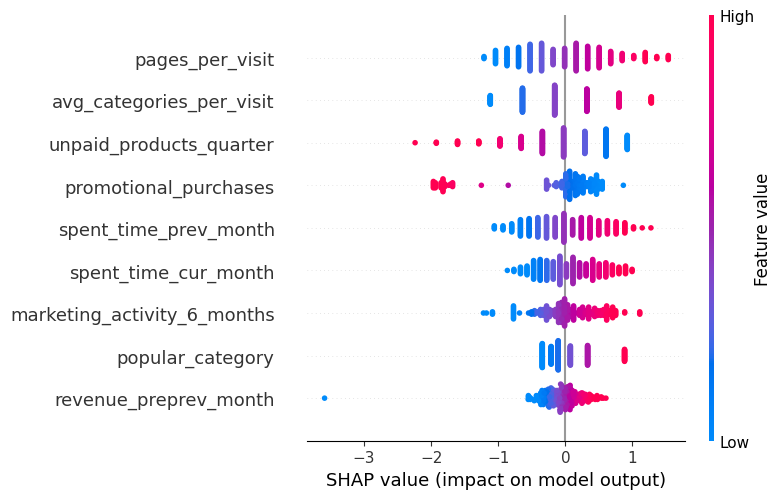

In [53]:
shap_perfomance_for_rfecv(rfecv_logreg, X_train, X_test)

- На изображении можно наблюдать все признаки, отобранные RFECV, и их качество по мнению shap
- Важными для логистической регресии являются признаки ```pages_per_visit```, ```avg_categories_per_visit```, ```unpaid_products_quarter```
- Наименее влиятельными из выбранных RFECV признаков являются ```revenue_preprev_month```, ```popular_category```, ```market_activity_6_months```

_____
### <a id='toc1_8_5_'></a>[Дерево решений](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_5_1_'></a>[Подбор гиперпараметров](#toc0_)

In [ ]:
pipeline = get_pipepline_clf(
    feature_selection='RFECV',
    numerical_columns=market.select_dtypes(include='number').columns,
    categorical_columns=['popular_category'],
    categorical_ordered_columns=['service_type', 'allow_notifications']
)

model_params_cat = {'model__estimator': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
                    'model__estimator__criterion': ['gini', 'entropy', 'log_loss'],
                    'model__estimator__splitter': ['best', 'random']}
model_params_num = {
    'model__estimator__max_depth': lambda trial: trial.suggest_int('model__estimator__max_depth', 3, 40),
    'model__estimator__min_samples_split': lambda trial: trial.suggest_int('model__estimator__min_samples_split', 2, 20),
    'model__estimator__min_samples_leaf': lambda trial: trial.suggest_int('model__estimator__min_samples_leaf', 1, 10)
}

study_tree = optuna.create_study(direction='maximize')
study_tree.optimize(objective, n_trials=300, show_progress_bar=True)

print('Best ROC AUC:', study_tree.best_value)
best_params = get_best_params(study_tree.best_params)
print('Best parameters:', best_params)

Best trial: 220. Best value: 0.869231: 100%|██████████| 300/300 [00:55<00:00,  5.45it/s]

Best ROC AUC: 0.8692307692307693
Best parameters: {'preprocessor__numerical__scaler': MinMaxScaler(), 'preprocessor__numerical__imputer': KNNImputer(), 'preprocessor__categorical__imputer': SimpleImputer(strategy='most_frequent'), 'preprocessor__categorical__encoder': WOEEncoder(handle_missing='return_nan', handle_unknown='return_nan',
           random_state=42), 'preprocessor__categorical__scaler': MinMaxScaler(), 'preprocessor__categorical_ordered__imputer_before': SimpleImputer(strategy='most_frequent'), 'preprocessor__categorical_ordered__encoder': JamesSteinEncoder(handle_missing='return_nan', handle_unknown='return_nan',
                  random_state=42), 'preprocessor__categorical_ordered__imputer_after': SimpleImputer(strategy='most_frequent'), 'preprocessor__categorical_ordered__scaler': MinMaxScaler(), 'model__estimator': DecisionTreeClassifier(random_state=42), 'model__estimator__criterion': 'entropy', 'model__estimator__splitter': 'random', 'model__estimator__max_depth': 

*Важность признаков судя по перебору*

In [55]:
plot_param_importances(study_tree)

- Самым влиятельным для модели гиперпараметром является ```preprocessor__categorical_ordered__encoder```
- Менее влиятельными, но тоже важными можно считать ```model__estimator__min_samples_split```, ```preprocessor__categorical__scaler``` и ```preprocessor__categorical__encoder```

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_5_2_'></a>[Feature Engineering](#toc0_)

*Обучим модель на лучших параметрах*

In [56]:
rfecv_tree = clone(pipeline).set_params(**best_params)
display(rfecv_tree)
rfecv_tree.fit(X_train, y_train.cat.codes)
rfecv_tree.score(X_test, y_test.cat.codes)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['marketing_activity_6_months', 'current_month_marketing_activity',
       'registration_duration', 'promotional_purchases',
       'avg_categories_per_visit', 'unpaid_products_quarter', 'service_errors',
       'pages_per_vis...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['service_type',
                                                   'allow_notifications'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 RFECV(cv=5,
                       estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=21,
                                                        min_samples_leaf=7,
                                                        min_samples_split=6,
                                                        random_state=42,
                                                        splitter='random'),
                       min_features_to_select=2, n_jobs=5,
                       scoring='roc_auc'))])

0.8461538461538461

*График зависимости качества модели от количества признаков*

In [57]:
feature_selection_perfomance(rfecv_logreg.named_steps['model'].cv_results_,
                             rfecv_tree.named_steps['model'].cv_results_,
                             model_names=['Логистическая регрессия',
                                          'Дерево решений'])

In [58]:
rfecv_tree.get_feature_names_out()

array(['promotional_purchases', 'avg_categories_per_visit',
       'pages_per_visit', 'revenue_preprev_month',
       'spent_time_prev_month', 'spent_time_cur_month',
       'popular_category'], dtype=object)

- Модель полагается больше на количественные фичи
- RFECV по итогу отобрал всего 7 признаков
- Качество на тестовой выборке составило ROC AUC = 0.846

*Интерпретация важности признаков через shap*

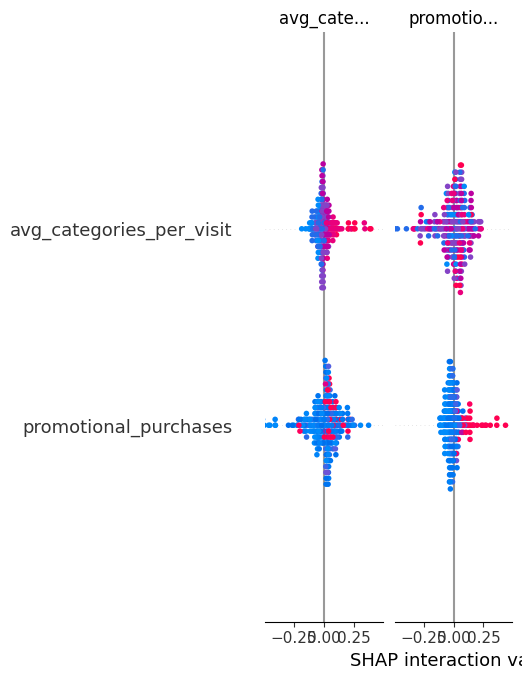

In [ ]:
shap_perfomance_for_rfecv(rfecv_tree, X_train, X_test)

_____
### <a id='toc1_8_6_'></a>[KNN](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_6_1_'></a>[Подбор гиперпараметров](#toc0_)

In [ ]:
pipeline = get_pipepline_clf(
    feature_selection='SelectKBest',
    numerical_columns=market.select_dtypes(include='number').columns,
    categorical_columns=['popular_category'],
    categorical_ordered_columns=['service_type', 'allow_notifications']
)

model_params_cat = {'model': [KNeighborsClassifier()],
                    'model__weights': ['uniform', 'distance']}
model_params_num = {
    'model__n_neighbors': lambda trial: trial.suggest_int('model__n_neighbors', 3, 100),
    'feature_selection__k': lambda trial: trial.suggest_int('feature_selection__k', 2, X_train.shape[1]),
}

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective, n_trials=300, show_progress_bar=True)

print('Best ROC AUC:', study_knn.best_value)
best_params = get_best_params(study_knn.best_params)
print('Best parameters:', best_params)

Best trial: 85. Best value: 0.888462: 100%|██████████| 300/300 [00:25<00:00, 11.99it/s]

Best ROC AUC: 0.8884615384615384
Best parameters: {'preprocessor__numerical__scaler': StandardScaler(), 'preprocessor__numerical__imputer': SimpleImputer(), 'preprocessor__categorical__imputer': SimpleImputer(strategy='most_frequent'), 'preprocessor__categorical__encoder': MEstimateEncoder(handle_missing='return_nan', handle_unknown='return_nan',
                 random_state=42), 'preprocessor__categorical__scaler': StandardScaler(), 'preprocessor__categorical_ordered__imputer_before': SimpleImputer(strategy='most_frequent'), 'preprocessor__categorical_ordered__encoder': JamesSteinEncoder(handle_missing='return_nan', handle_unknown='return_nan',
                  random_state=42), 'preprocessor__categorical_ordered__imputer_after': KNNImputer(), 'preprocessor__categorical_ordered__scaler': MinMaxScaler(), 'model': KNeighborsClassifier(), 'model__weights': 'distance', 'model__n_neighbors': 5, 'feature_selection__k': 6}


*Важность признаков судя по перебору*

In [61]:
plot_param_importances(study_knn)

- Наиболее значимым гиперпараметром считается ```feature_selection__k```
- Также стоит отметить вклад параметров ```model_weights```, ```preprocessor__numerical__scaler```, ```model__n_neighbors```

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_6_2_'></a>[Feature Engineering](#toc0_)

*Обучим модель на лучших параметрах*

In [62]:
knn = clone(pipeline).set_params(**best_params)
display(knn)
knn.fit(X_train, y_train.cat.codes)
knn.score(X_test, y_test.cat.codes)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['marketing_activity_6_months', 'current_month_marketing_activity',
       'registration_duration', 'promotional_purchases',
       'avg_categories_per_visit', 'unpaid_products_quarter', 'service_errors',
       'pages_pe...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   JamesSteinEncoder(handle_missing='return_nan',
                                                                                     handle_unknown='return_nan',
                                                                                     random_state=42)),
                                                                  ('imputer_after',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['service_type',
                                                   'allow_notifications'])],
                                   verbose_feature_names_out=False)),
                ('feature_selection', SelectKBest(k=6)),
                ('model', KNeighborsClassifier(weights='distance'))])

0.9

In [63]:
feature_selection_perfomance(rfecv_logreg.named_steps['model'].cv_results_,
                             rfecv_tree.named_steps['model'].cv_results_,
                             study_knn.trials_dataframe().groupby('params_feature_selection__k')['value'].max(),
                             model_names=['Логистическая регрессия', 'Дерево решений', 'KNN'])

- ROC AUC на тестовой выборке составляет 0.900
- Модель показывает лучшие результаты на 6 признаках
- Можно заметить, что модель после пика идет по нисходящей, видимо из переобучения

_____
### <a id='toc1_8_7_'></a>[Метод опорных векторов](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_7_1_'></a>[Подбор гиперпараметров](#toc0_)

In [ ]:
pipeline = get_pipepline_clf(
    feature_selection='SelectKBest',
    numerical_columns=market.select_dtypes(include='number').columns,
    categorical_columns=['popular_category'],
    categorical_ordered_columns=['service_type', 'allow_notifications']
)

model_params_cat = {'model': [SVC(random_state=RANDOM_STATE)],
                    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
model_params_num = {
    'model__C': lambda trial: trial.suggest_float('model__C', 1e-3, 1e3, log=True),
    'model__gamma': lambda trial: trial.suggest_float('model__gamma', 1e-3, 1, log=True),
    'model__degree': lambda trial: trial.suggest_int('model__degree', 2, 4),
    'model__coef0': lambda trial: trial.suggest_float('model__coef0', 0.0, 10.0),
    'feature_selection__k': lambda trial: trial.suggest_int('feature_selection__k', 2, X_train.shape[1]),
}

study_svc = optuna.create_study(direction='maximize')
study_svc.optimize(objective, n_trials=300, show_progress_bar=True, timeout=900)

print('Best ROC AUC:', study_svc.best_value)
best_params = get_best_params(study_svc.best_params)
print('Best parameters:', best_params)

Best trial: 153. Best value: 0.888462: 100%|██████████| 300/300 [01:11<00:00,  4.20it/s, 71.45/900 seconds]

Best ROC AUC: 0.8884615384615384
Best parameters: {'preprocessor__numerical__scaler': StandardScaler(), 'preprocessor__numerical__imputer': IterativeImputer(estimator=DecisionTreeRegressor(random_state=42)), 'preprocessor__categorical__imputer': SimpleImputer(strategy='most_frequent'), 'preprocessor__categorical__encoder': LeaveOneOutEncoder(handle_missing='return_nan', handle_unknown='return_nan',
                   random_state=42), 'preprocessor__categorical__scaler': MinMaxScaler(), 'preprocessor__categorical_ordered__imputer_before': SimpleImputer(strategy='most_frequent'), 'preprocessor__categorical_ordered__encoder': MEstimateEncoder(handle_missing='return_nan', handle_unknown='return_nan',
                 random_state=42), 'preprocessor__categorical_ordered__imputer_after': SimpleImputer(strategy='most_frequent'), 'preprocessor__categorical_ordered__scaler': MinMaxScaler(), 'model': SVC(random_state=42), 'model__kernel': 'poly', 'model__C': 458.9493713377635, 'model__gamma': 0

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_7_2_'></a>[Feature Engineering](#toc0_)

*Важность признаков судя по перебору*

In [66]:
plot_param_importances(study_svc)

- Наиболее значимым признаком считается ```model__kernel```
- Также стоит отметить признаки ```model__coef0```, ```feature_selection__k```,  ```model__C```

*Обучим модель на лучших параметрах*

In [67]:
svc = clone(pipeline).set_params(**best_params)
display(svc)
svc.fit(X_train, y_train.cat.codes)
svc.score(X_test, y_test.cat.codes)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(estimator=DecisionTreeRegressor(random_state=42))),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['marketing_activity_6_months', 'current_month_marketing_activity',
       'registration_duration', 'promotional_purchases',
       'avg_categories_per_visit', '...
                                                                                    handle_unknown='return_nan',
                                                                                    random_state=42)),
                                                                  ('imputer_after',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['service_type',
                                                   'allow_notifications'])],
                                   verbose_feature_names_out=False)),
                ('feature_selection', SelectKBest(k=6)),
                ('model',
                 SVC(C=458.9493713377635, coef0=4.05640479391944, degree=2,
                     gamma=0.0023319200698142754, kernel='poly',
                     random_state=42))])

0.9

In [68]:
feature_selection_perfomance(rfecv_logreg.named_steps['model'].cv_results_,
                             rfecv_tree.named_steps['model'].cv_results_,
                             study_knn.trials_dataframe().groupby('params_feature_selection__k')['value'].max(),
                             study_svc.trials_dataframe().groupby('params_feature_selection__k')['value'].max(),
                             model_names=['Логистическая регрессия', 'Дерево решений', 'KNN', 'Метод опорных векторов'])

- Результаты топ модели на тестововой выборке составляет 0.900
- Модель ведет себя аналогично модели KNN

_____
### <a id='toc1_8_8_'></a>[Вывод](#toc0_)

In [ ]:
feature_selection_perfomance(rfecv_logreg.named_steps['model'].cv_results_,
                             rfecv_tree.named_steps['model'].cv_results_,
                             study_knn.trials_dataframe().groupby('params_feature_selection__k')['value'].max(),
                             study_svc.trials_dataframe().groupby('params_feature_selection__k')['value'].max(),
                             model_names=['Логистическая регрессия', 'Дерево решений', 'KNN', 'Метод опорных векторов'])

1. Логистическая регрессия
- Показала стабильные результаты.
- Лучший ROC AUC составил 0.904.
- Логистическая регрессия показала устойчивость к уменьшению числа признаков, сохраняя высокое качество при 10 признаках.
- Легко интерпретируемая модель, что является значимым фактором для бизнеса.

2. Дерево решений
- Продемонстрировало хороший результат (ROC AUC = 0.846) при использовании небольшого количества признаков (5).
- Однако уступает логистической регрессии в стабильности качества.

3. K-Nearest Neighbors (KNN)
- Достиг максимального ROC AUC 0.900, но качество сильно варьировалось в зависимости от числа признаков, что указывает на нестабильность модели.

4. Метод опорных векторов (SVC)
- Наивысший ROC AUC составил 0.900, однако показала нестабильное поведение при разном количестве признаков.
- Однако модель менее интерпретируема, а качество на малом числе признаков нестабильно, что усложняет применение в реальных условиях.


<hr style="border: none; border-top: 2px dashed;">

- Итоговая модель: Logistic Regression
    
    Выбор итоговой модели обусловлен следующими причинами:
    - Интерпретируемость: Логистическая регрессия позволяет легко понять значимость отдельных признаков и их влияние на целевую переменную, что важно для 
    - принятия решений в бизнесе.
    - Стабильность: Модель показывает стабильно высокое качество независимо от числа используемых признаков, что делает ее надежным выбором.
    - Качество: Лучшее среди обученных моделей.

*Признаки по важности:*

In [ ]:
pd.DataFrame(zip(X_train.columns, rfecv_logreg.named_steps['model'].ranking_), columns=['feature', 'rank']).sort_values(by='rank')

,feature,rank
0,service_type,1
3,current_month_marketing_activity,1
4,registration_duration,1
5,promotional_purchases,1
7,avg_categories_per_visit,1
9,service_errors,1
11,revenue_prev_month,1
12,revenue_preprev_month,1
13,revenue_cur_month,1
8,unpaid_products_quarter,2


_____
_____
## <a id='toc1_9_'></a>[Сегментация покупателей](#toc0_)

Для чистоты анализа возьмем тестовую выборку для анализа. Добавим в нее предсказания выбранной модели. Также добавим к нашему датасету данные из таблицы ```money```.

In [71]:
segmentation = X_test.copy()
segmentation['probability_of_decrease'] = rfecv_logreg.predict_proba(X_test)[:, 0]
segmentation = segmentation.merge(money, on='id')
segmentation['customer_activity'] = y_test.cat.codes
market_columns_translate.update({'Прибыль': 'profit', 'Вероятность снижения покупательской активности': 'probability_of_decrease'})
segmentation.head()

,service_type,allow_notifications,marketing_activity_6_months,current_month_marketing_activity,registration_duration,promotional_purchases,popular_category,avg_categories_per_visit,unpaid_products_quarter,service_errors,pages_per_visit,revenue_prev_month,revenue_preprev_month,revenue_cur_month,spent_time_prev_month,spent_time_cur_month,probability_of_decrease,profit,customer_activity
id,,,,,,,,,,,,,,,,,,,
216122,стандарт,да,5.8,5,365,0.17,Техника для красоты и здоровья,6,2,4,8,4593,4545,4681,11,13,0.049407,860,1
216159,премиум,да,3.3,5,846,0.25,Мелкая бытовая техника и электроника,6,2,4,6,4835,5368,4504,9,21,0.049794,2730,1
215350,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457,4826,5058,8,13,0.230272,3130,0
216062,стандарт,нет,3.9,4,311,0.26,Кухонная посуда,3,1,4,10,5534,4451,6602,13,9,0.420022,3060,1
215456,стандарт,да,1.7,4,449,0.23,Косметика и аксесуары,3,4,4,5,5134,4353,6318,10,9,0.951512,5830,0


In [72]:
statistical_graphis_for_numeric(segmentation.probability_of_decrease, xaxis_title=market_columns_translate.inverse['probability_of_decrease'], nbinsx=30)

Видно, что распределение двумодельное. Второй горб описывает клиентов, склонных на снижение покупательской активности. Можно однозначно сказать, что есть явная причина, по которой часть клиентов уходят, приэтом другую часть покупателей это не задело. 

### <a id='toc1_9_1_'></a>[Категории для сегментации](#toc0_)

<img src="https://pictures.s3.yandex.net/resources/image_1695485033.png" width="1000"/>

In [ ]:
color_palette = cycle(px.colors.qualitative.Plotly)


def pieplot_grouped_by_customer_activity(data: pd.DataFrame, column, top_n_in_pie=5):
    """
    Функция для построения двух круговых диаграмм, показывающих распределение значений категориального столбца
    для двух групп данных: с уменьшенной активностью и с сохраненной активностью.

    Группировка данных происходит по значениям в колонке `customer_activity`, где:
    - `0` — означает снижение активности.
    - `1` — означает сохранение прежнего уровня активности.

    На каждой диаграмме отображаются топ-N категорий для выбранного столбца с категорией "Остальные" для оставшихся значений.

    Parameters
    ----------
    data : pd.DataFrame
        Входные данные в виде DataFrame, содержащие колонку `customer_activity` и категориальный столбец `column`, для которого строятся диаграммы.
    
    column : str
        Имя категориальной колонки, для которой строятся круговые диаграммы. Эта колонка должна быть частью DataFrame.
    
    top_n_in_pie : int, по умолчанию 5
        Количество топ-N категорий, которые будут отображены на каждой диаграмме. Остальные категории будут объединены в одну категорию "Остальные".
    """ 
    fig = make_subplots(
        rows=1, cols=2, specs=[[ {'type': 'domain'}, {'type': 'domain'}]],
        subplot_titles=('Уровень активности снизился', 'Прежний уровень активности')
    )
    
    category_agg = data[data.customer_activity == 0][column].value_counts()
    other = [category_agg[top_n_in_pie:].sum()]
    fig.add_trace(
        go.Pie(labels=category_agg.head(top_n_in_pie).index.tolist() + (['Остальные'] if other[0] else []),
               values=category_agg.head(top_n_in_pie).values.tolist() + (other if other[0] else []),
               name='',
               textinfo='label+percent'),
        row=1, col=1
    )
    
    category_agg = data[data.customer_activity == 1][column].value_counts()
    other = [category_agg[top_n_in_pie:].sum()]
    fig.add_trace(
        go.Pie(labels=category_agg.head(top_n_in_pie).index.tolist() + (['Остальные'] if other[0] else []),
               values=category_agg.head(top_n_in_pie).values.tolist() + (other if other[0] else []),
               name='',
               textinfo='label+percent'),
        row=1, col=2
    )

    fig.update_layout(
        title_text=f'Круговые диаграммы по колонке <b>{market_columns_translate.inverse[column]}</b><br>(<b>{column}</b>)',
        title_x=0.5,
        showlegend=True,
        width=1200,
        height=600,
    )

    fig.show()


def histogram_grouped_by_customer_activity(data: pd.DataFrame, column, nbinsx):
    """
    Функция для построения гистограмм, показывающих распределение значений числовой колонки
    для двух групп данных: с уменьшенной активностью и с сохраненной активностью.

    Группировка данных происходит по значениям в колонке `customer_activity`, где:
    - `0` — означает снижение активности.
    - `1` — означает сохранение прежнего уровня активности.

    Строятся две гистограммы, каждая для одной из групп с указанием частоты значений для выбранного столбца.

    Parameters
    ----------
    data : pd.DataFrame
        Входные данные в виде DataFrame, содержащие колонку `customer_activity` и числовой столбец `column`, для которого строятся гистограммы.
    
    column : str
        Имя числовой колонки, для которой строятся гистограммы. Эта колонка должна быть частью DataFrame.
    
    nbinsx : int
        Количество корзин (бин) для гистограммы.
    """
    data_class_0 = data[data.customer_activity == 0][column]
    data_class_1 = data[data.customer_activity == 1][column]

    fig = go.Figure()

    fig.add_trace(
        go.Histogram(
            x=data_class_0,
            name='Уровень активности снизился',
            opacity=0.5,
            marker=dict(color='blue'),
            nbinsx=nbinsx
        )
    )

    fig.add_trace(
        go.Histogram(
            x=data_class_1,
            name='Прежний уровень активности',
            opacity=0.5,
            marker=dict(color='orange'),
            nbinsx=nbinsx
        )
    )

    fig.update_layout(
        title_text=f'Гистограммы по колонке <b>{market_columns_translate.inverse[column]}</b><br>(<b>{column}</b>)',
        xaxis_title=column,
        yaxis_title='Частота',
        barmode='overlay',
        legend=dict(title="Класс активности"),
        width=900,
        height=500
    )

    fig.show()


def draw_scatter_between_probability_of_decrease_and(data: pd.DataFrame, num_col, cat_cols, opacity=0.4, rows=2, cols=2, height=1200, width=1200):
    """
    Функция для построения диаграмм рассеяния между вероятностью снижения активности 
    и числовым столбцом, разбитым по классам категориальных признаков.

    Для каждого категориального признака (из списка `cat_cols`) строится диаграмма рассеяния 
    для каждого уникального значения категории, а также линия тренда для каждой группы. 
    Также отображается общая линия тренда для всего датасета.

    Parameters
    ----------
    data : pd.DataFrame
        Входные данные в виде DataFrame, содержащие как минимум два столбца:
        - числовой столбец `num_col`, по которому строится график.
        - колонка с вероятностью снижения активности `probability_of_decrease`.
        - Набор категориальных признаков для группировки.
    
    num_col : str
        Имя числового столбца в DataFrame, для которого строится диаграмма рассеяния.

    cat_cols : list[str]
        Список категориальных признаков, по которым будет выполняться группировка данных 
        и строиться отдельная диаграмма рассеяния.

    opacity : float, по умолчанию 0.4
        Степень прозрачности точек на графике (от 0 до 1).

    rows : int, по умолчанию 2
        Количество строк для размещения графиков в сетке.

    cols : int, по умолчанию 2
        Количество столбцов для размещения графиков в сетке.

    height : int, по умолчанию 1200
        Высота итогового графика в пикселях.

    width : int, по умолчанию 1200
        Ширина итогового графика в пикселях.
    """
    fig = make_subplots(
        rows=rows, cols=cols, vertical_spacing=0.09,
        subplot_titles=[market_columns_translate.inverse[col] for col in data.select_dtypes(include='object').columns]
    )

    for cetegoty_i, category_col in enumerate(cat_cols):
        # Перебор категориальных признаков

        for class_of_category, group_of_category in data.groupby(category_col):
            # Перебор по каждому классу категории

            color = next(color_palette)
            x = group_of_category[num_col]
            y = group_of_category['probability_of_decrease']

            # диаграмма рассеяния по классу
            fig.add_trace(
                go.Scatter(
                    x=x,
                    y=y,
                    mode='markers',
                    marker=dict(size=7, opacity=opacity, color=color),
                    name=class_of_category,
                    legendgroup=market_columns_translate.inverse[category_col],
                    legendgrouptitle=dict(text=market_columns_translate.inverse[category_col]),
                ),
                row=cetegoty_i // cols + 1, col=cetegoty_i % cols + 1
            )
            slope, intercept = np.polyfit(x, y, 1)
            trend_line = slope * x + intercept

            # Линия тренда по классу
            fig.add_trace(
                go.Scatter(
                    x=x,
                    y=trend_line,
                    mode='lines',
                    line=dict(
                        color=f'rgb{find_intermediate_color(hex_to_rgb(color), [0] * 3, 0.4)}',
                        width=3
                    ),
                    name='Линия тренда',
                    visible='legendonly',
                    legendgroup=market_columns_translate.inverse[category_col],
                ),
                row=cetegoty_i // cols + 1, col=cetegoty_i % cols + 1
            )

        # Общая линия тренда
        slope, intercept = np.polyfit(data[num_col], data.probability_of_decrease, 1)
        trend_line = slope * data[num_col] + intercept
        fig.add_trace(
            go.Scatter(
                x=data[num_col],
                y=trend_line,
                mode='lines',
                name='Общая линия тренда',
                visible='legendonly',
                line=dict(color='black', width=3),
                legendgroup=market_columns_translate.inverse[category_col],
            ),
            row=cetegoty_i // 2 + 1, col=cetegoty_i % 2 + 1
        )
        fig.update_xaxes(title_text=market_columns_translate.inverse[num_col], row=cetegoty_i // 2 + 1, col=cetegoty_i % 2 + 1)
        fig.update_yaxes(title_text=market_columns_translate.inverse['probability_of_decrease'], row=cetegoty_i // 2 + 1, col=cetegoty_i % 2 + 1)

    title=(f'Диаграммы рассеяния между признаками <b>Вероятность снижения активности</b><br>и <b>{market_columns_translate.inverse[num_col]}</b>,' +
           f'разбитые по классам категориальных признаков<br>corr={data.probability_of_decrease.corr(data[num_col]):.3f}')
    fig.update_layout(
        title=title,
        title_y=0.98,
        title_x=0.5,
        height=height,
        width=width,
        legend=dict(
            traceorder='grouped',
            groupclick='toggleitem',
        ),
    )
    fig.show()

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_9_1_1_'></a>[Коммуникация с клиентом](#toc0_)

In [ ]:
communication  = segmentation[['service_type', 'allow_notifications', 'marketing_activity_6_months', 'current_month_marketing_activity', 'registration_duration', 'probability_of_decrease', 'customer_activity']]
communication.head()

,service_type,allow_notifications,marketing_activity_6_months,current_month_marketing_activity,registration_duration,probability_of_decrease,customer_activity
id,,,,,,,
216122,стандарт,да,5.8,5,365,0.049407,1
216159,премиум,да,3.3,5,846,0.049794,1
215350,стандарт,нет,4.9,3,539,0.230272,0
216062,стандарт,нет,3.9,4,311,0.420022,1
215456,стандарт,да,1.7,4,449,0.951512,0


In [75]:
cat_cols = ['service_type', 'allow_notifications', 'current_month_marketing_activity']
for cat_col in ['service_type', 'allow_notifications', 'current_month_marketing_activity']:
    pieplot_grouped_by_customer_activity(communication, cat_col)

- По круговой диаграмме ```Тип сервиса``` видно, что покупатальская активность снизилась больше у клиентов с типом сервиса премиум 

In [76]:
for num_col in ['marketing_activity_6_months', 'registration_duration']:
    histogram_grouped_by_customer_activity(communication, num_col, nbinsx=20)
    draw_scatter_between_probability_of_decrease_and(communication, num_col, cat_cols, rows=2, height=900)

- По гистограмме ```Маркет_актив_6_мес``` видно, что клиенты, которым было уделено меньше маркетингого привлечения, имеет спад поупательской активность (все логично).

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_9_1_2_'></a>[Продуктовое поведение](#toc0_)

In [ ]:
product_behavior = segmentation[['popular_category', 'avg_categories_per_visit', 'unpaid_products_quarter', 'probability_of_decrease', 'customer_activity']]
product_behavior.head()

,popular_category,avg_categories_per_visit,unpaid_products_quarter,probability_of_decrease,customer_activity
id,,,,,
216122,Техника для красоты и здоровья,6,2,0.049407,1
216159,Мелкая бытовая техника и электроника,6,2,0.049794,1
215350,Домашний текстиль,5,2,0.230272,0
216062,Кухонная посуда,3,1,0.420022,1
215456,Косметика и аксесуары,3,4,0.951512,0


In [78]:
for cat_col in ['popular_category', 'unpaid_products_quarter']:
    pieplot_grouped_by_customer_activity(product_behavior, cat_col, top_n_in_pie=7)

- Видно, что из-за уменьшения продаж "Техника для красоты и здоровья" и "Мелкая бытовая техника и электроника" уменьшилась и покупательская активность. Вполне возможно что уменьшение продаж этих категорий напрямую связано с уменьшением поставок, следственно некоторые клиенты купили себе товары этой категории в других магазинах.

In [79]:
histogram_grouped_by_customer_activity(product_behavior, 'avg_categories_per_visit', nbinsx=20)
draw_scatter_between_probability_of_decrease_and(product_behavior, 'avg_categories_per_visit', ['popular_category', 'unpaid_products_quarter'], rows=1, height=650)

C:\Users\bezgr\AppData\Local\Temp\ipykernel_13288\1854356865.py:2: RankWarning:

Polyfit may be poorly conditioned



- Гистограмма подтверждает предыдущий вывод о нехватке ассортимента на полках магазина, так как видно, что клиент просмматривает меньшее кол-во категорий, из-за нехватки продукции.

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_9_1_3_'></a>[Поведение на сайте](#toc0_)

In [ ]:
site_behavior = segmentation[
    ['spent_time_cur_month', 'spent_time_prev_month', 'pages_per_visit', 'service_errors', 'probability_of_decrease', 'customer_activity']
].merge((market_time.groupby('id')['minutes'].sum() / 2), on='id').rename(columns={'minutes': 'avg_minutes'})
site_behavior.head()

,spent_time_cur_month,spent_time_prev_month,pages_per_visit,service_errors,probability_of_decrease,customer_activity,avg_minutes
id,,,,,,,
216122,13,11,8,4,0.049407,1,12.0
216159,21,9,6,4,0.049794,1,15.0
215350,13,8,5,1,0.230272,0,10.5
216062,9,13,10,4,0.420022,1,11.0
215456,9,10,5,4,0.951512,0,9.5


In [81]:
for num_col in ['spent_time_cur_month', 'spent_time_prev_month', 'pages_per_visit', 'service_errors']:
    histogram_grouped_by_customer_activity(site_behavior, num_col, nbinsx=20)
    draw_scatter_between_probability_of_decrease_and(site_behavior, num_col, ['customer_activity'], opacity=0.7, rows=1, cols=1, height=650, width=900)

- На данных гистограммах можно отчетливо увидеть, что время, проведенное на сайте упало у клиентов с низким уровнем активности. С одной стороны это поледствие уменьшение активности, однако такую природу гистограмм можно описать и с другой стороны, к примеру: Пользователь не нашел нужных товаров, поэтому пошел искать в другой магазин.

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_9_1_4_'></a>[Финансовое поведение](#toc0_)

In [ ]:
financial_behavior = segmentation[['revenue_cur_month', 'probability_of_decrease', 'customer_activity']]
financial_behavior['revenue_diff_cur_prev_month'] = X_test['revenue_cur_month'] - X_test['revenue_prev_month']
financial_behavior['revenue_diff_prev_preprev_month'] = X_test['revenue_prev_month'] - X_test['revenue_preprev_month']
financial_behavior.head()

C:\Users\bezgr\AppData\Local\Temp\ipykernel_13288\3328554826.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bezgr\AppData\Local\Temp\ipykernel_13288\3328554826.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,revenue_cur_month,probability_of_decrease,customer_activity,revenue_diff_cur_prev_month,revenue_diff_prev_preprev_month
id,,,,,
216122,4681,0.049407,1,88,48
216159,4504,0.049794,1,-331,-533
215350,5058,0.230272,0,-399,631
216062,6602,0.420022,1,1068,1083
215456,6318,0.951512,0,1184,781


In [83]:
market_columns_translate.update({'Разница в выручке между текущим и прошлым месяцами': 'revenue_diff_cur_prev_month', 'Разница в выручке между прошлым и позапрошлым месяцями': 'revenue_diff_prev_preprev_month'})

In [84]:
for num_col in ['revenue_cur_month', 'revenue_diff_cur_prev_month', 'revenue_diff_prev_preprev_month']:
    histogram_grouped_by_customer_activity(financial_behavior, num_col, nbinsx=40)
    draw_scatter_between_probability_of_decrease_and(financial_behavior, num_col, ['customer_activity'], opacity=0.7, rows=1, cols=1, height=650, width=900)

- Здесь мы можем наблюдать уменьшение выручки с клиентов, покупательская активность которых падает, это не причина, а следствие.

_____
### <a id='toc1_9_2_'></a>[Вывод](#toc0_)

1. **Сегментация покупателей**:
    - Распределение вероятности снижения покупательской активности имеет двумодальное распределение, что указывает на наличие двух различных групп клиентов.
    - Клиенты с типом сервиса "премиум" имеют более высокую вероятность снижения покупательской активности по сравнению с клиентами с типом сервиса "стандарт".
    - Клиенты, которым было уделено меньше маркетингового внимания за последние 6 месяцев, имеют более высокую вероятность снижения покупательской активности.

2. **Продуктовое поведение**:
    - Снижение покупательской активности связано с уменьшением продаж в категориях "Техника для красоты и здоровья" и "Мелкая бытовая техника и электроника".
    - Клиенты, которые просматривают меньшее количество категорий за визит, имеют более высокую вероятность снижения покупательской активности, что может указывать на нехватку ассортимента.

3. **Поведение на сайте**:
    - Клиенты с низким уровнем активности проводят меньше времени на сайте, что может быть как следствием, так и причиной снижения покупательской активности.
    - У клиентов с низким уровнем активности также наблюдается меньшее количество страниц за визит и большее количество ошибок сервиса.

4. **Финансовое поведение**:
    - Снижение покупательской активности сопровождается уменьшением выручки от клиентов, что является следствием снижения их активности.
    - Клиенты с высокой вероятностью снижения покупательской активности показывают отрицательную динамику выручки за последние месяцы.

- ***Предложения бизнесу***
1. **Увеличение маркетинговой активности**:
    - **Причина**: Анализ показал, что клиенты с низкой маркетинговой активностью за последние 6 месяцев имеют более высокую вероятность снижения покупательской активности.
    - **Предложение**: Увеличить количество маркетинговых кампаний, направленных на этот сегмент клиентов, с акцентом на персонализированные предложения и скидки.

2. **Оптимизация ассортимента товаров**:
    - **Причина**: Клиенты, которые просматривают меньшее количество категорий товаров, имеют более высокую вероятность снижения покупательской активности. Это может быть связано с нехваткой интересующих их товаров.
    - **Предложение**: Провести анализ ассортимента и увеличить наличие популярных категорий товаров, таких как "Техника для красоты и здоровья" и "Мелкая бытовая техника и электроника".

3. **Улучшение пользовательского опыта на сайте**:
    - **Причина**: Клиенты, которые проводят меньше времени на сайте и сталкиваются с ошибками сервиса, имеют более высокую вероятность снижения покупательской активности.
    - **Предложение**: Оптимизировать работу сайта, уменьшить количество ошибок сервиса и улучшить навигацию, чтобы пользователи могли легко находить интересующие их товары.

4. **Персонализированные уведомления**:
    - **Причина**: Клиенты, которые разрешили получать уведомления, имеют более высокую вероятность снижения покупательской активности.
    - **Предложение**: Персонализировать уведомления, чтобы они были более релевантными и интересными для клиентов, что может повысить их вовлеченность и активность.

_____
_____
## <a id='toc1_10_'></a>[Общий вывод](#toc0_)

**Модели**
1. **Логистическая регрессия**:
    - Показала стабильные результаты.
    - Лучший ROC AUC составил 0.892.
    - Логистическая регрессия показала устойчивость к уменьшению числа признаков, сохраняя высокое качество при 10 признаках.
    - Легко интерпретируемая модель, что является значимым фактором для бизнеса.
2. **Дерево решений**:
    - Продемонстрировало хороший результат (ROC AUC = 0.846) при использовании небольшого количества признаков (5).
    - Однако уступает логистической регрессии в стабильности качества.

3. **K-Nearest Neighbors (KNN)**:
    - Достиг максимального ROC AUC 0.904, но качество сильно варьировалось в зависимости от числа признаков, что указывает на нестабильность модели.

4. **Метод опорных векторов (SVC)**:
    - Наивысший ROC AUC составил 0.904, однако показала нестабильное поведение при разном количестве признаков.
    - Модель менее интерпретируема, а качество на малом числе признаков нестабильно, что усложняет применение в реальных условиях.

- **Логистическая регрессия** была выбрана в качестве итоговой модели по следующим причинам:
    - **Интерпретируемость**: Логистическая регрессия позволяет легко понять значимость отдельных признаков и их влияние на целевую переменную, что важно для принятия решений в бизнесе.
    - **Стабильность**: Модель показывает стабильно высокое качество независимо от числа используемых признаков, что делает ее надежным выбором.
    - **Качество**: Несмотря на немного более низкий ROC AUC по сравнению с KNN и SVC, разница не является критичной, а дополнительные преимущества интерпретируемости и устойчивости перевешивают.

**Предложения бизнесу**
1. **Увеличение маркетинговой активности**:
    - **Причина**: Анализ показал, что клиенты с низкой маркетинговой активностью за последние 6 месяцев имеют более высокую вероятность снижения покупательской активности.
    - **Предложение**: Увеличить количество маркетинговых кампаний, направленных на этот сегмент клиентов, с акцентом на персонализированные предложения и скидки.
2. **Оптимизация ассортимента товаров**:
    - **Причина**: Клиенты, которые просматривают меньшее количество категорий товаров, имеют более высокую вероятность снижения покупательской активности. Это может быть связано с нехваткой интересующих их товаров.
    - **Предложение**: Провести анализ ассортимента и увеличить наличие популярных категорий товаров, таких как "Техника для красоты и здоровья" и "Мелкая бытовая техника и электроника".
3. **Улучшение пользовательского опыта на сайте**:
    - **Причина**: Клиенты, которые проводят меньше времени на сайте и сталкиваются с ошибками сервиса, имеют более высокую вероятность снижения покупательской активности.
    - **Предложение**: Оптимизировать работу сайта, уменьшить количество ошибок сервиса и улучшить навигацию, чтобы пользователи могли легко находить интересующие их товары.
4. **Персонализированные уведомления**:
    - **Причина**: Клиенты, которые разрешили получать уведомления, имеют более высокую вероятность снижения покупательской активности.
    - **Предложение**: Персонализировать уведомления, чтобы они были более релевантными и интересными для клиентов, что может повысить их вовлеченность и активность.